# Video: Newton's Method in Action

This video illustrates Newton's method to find zeros of a one parameter model.

Script:
* In this video, I will show you an example of Newton's method with a simple function.

## Example Function


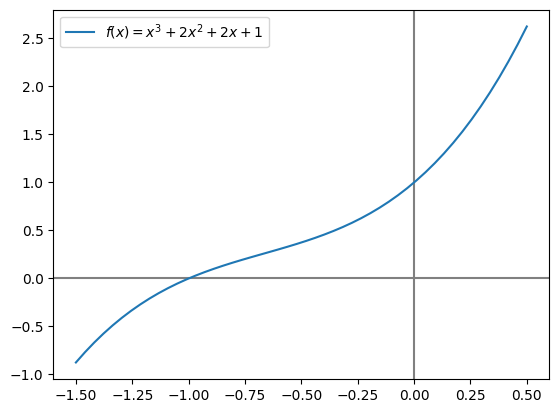

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    #return (x+1)**3 - (x+1)**2 + (x+1)
    return x**3 + 2 * x**2 + 2 * x + 1

def f1(x):
    return 3 * x**2 + 4*x + 2

xs = np.linspace(-1.5, 0.5)
plt.axhline(y=0, color="grey")
plt.axvline(x=0, color="grey")
plt.plot(xs, [f(x) for x in xs], label="$f(x) = x^3 + 2x^2 + 2x + 1$")
plt.legend()

None

Script:
* This function is $f(x) = x^3 + 2x^2 + 2x + 1$.
* You can see this function crossing the $x$ axis at -1.
* You can plug in to the formula for $f(-1)$ and confirm that it is zero.
* But let's pretend that we did not notice that.
* How can we find that solution to $f(x)=0$ automatically?

Script:
* The first thing to do with Newton's method is to pick an initial estimate.
* Sometimes, your problem will come with a range bounding possible solutions.
* If you have a range, use its midpoint as your initial estimate.
* Otherwise, just pick zero.
* We will call this initial estimate for the solution $x_0$.

## An Initial Guess


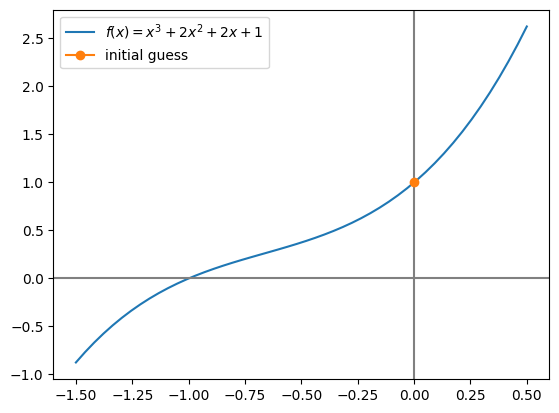

In [ ]:
plt.plot(xs, [f(x) for x in xs], label="$f(x) = x^3 + 2x^2 + 2x + 1$")

x0 = 0

plt.axhline(y=0, color="grey")
plt.axvline(x=0, color="grey")
plt.plot(x0, f(x0), label="initial guess", marker="o")

plt.legend()

None

Script:
* The next step is to calculate the slope.
* The details here will vary depending on if you have a formula for $f$ or not.


## Calculating the Slope

\begin{array}{rcl}
f(x) & = & x^3 + 2x^2 + 2x + 1 \\
f'(x) & = & 3 x^2 + 4x + 2 \\
\text{or} & & \\
f'(x) & \approx & \frac{f(x+0.01) - f(x-0.01)}{2 * 0.01} \\
\end{array}



Script:
* If you have the formula, you can calculate the derivative $f'(x_0)$.
* Or if you do not, you can approximate it by calculating $f$ for slightly higher and lower values of $x$, and computing the average rate of change between them.
* Either way, you get a slope and can write a formula for the tangent line at our current estimate.

## Tangent Line at Guess


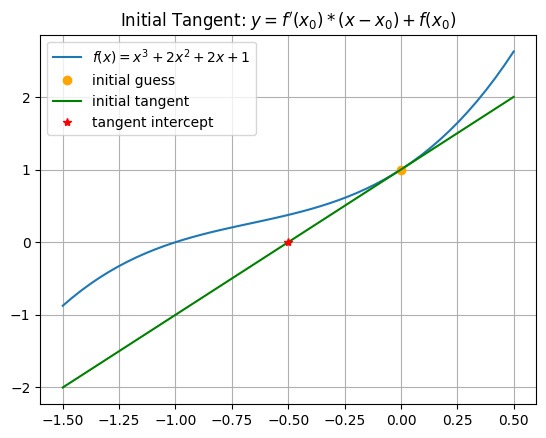

In [ ]:
plt.plot(xs, [f(x) for x in xs], label="$f(x) = x^3 + 2x^2 + 2x + 1$")
plt.plot(x0, f(x0), label="initial guess", marker="o", linestyle="", color="orange")

plt.plot(xs, f(x0) + (xs-x0)*f1(x0), label="initial tangent", color="green")
plt.plot([x0-f(x0)/f1(x0)], [0], label="tangent intercept", linestyle="", marker="*", color="red")

plt.grid(True)
plt.legend()
plt.title("Initial Tangent: $y = f'(x_0) * (x - x_0) + f(x_0)$")

None

Script:
* The $x$ value where this tangent line meets the $x$-axis, its $x$-intercept, will be the next estimate for the solution.
* So with some quick algebra...

## Computing the Next Guess

We want our next guess $x_1$ to be the $x$-intercept of the tangent line.

\begin{array}{rrcl}
\text{Initial tangent line:} & y & = & f'(x_0) * (x - x_0) + f(x_0) \\
\text{Solve for $y=0$ when $x=x_1$.} & 0 & = & f'(x_0) * (x_1 - x_0) + f(x_0) \\
& -f(x_0) & = & f'(x_0) * (x_1 - x_0) \\
& -\frac{f(x_0)}{f'(x_0)} & = & x_1 - x_0 \\
& x0 - \frac{f(x_0)}{f'(x_0)} & = & x_1 \\
\end{array}

Script:
* So, we compute the second estimate by subtracting the first function output divided by the first slope from the first estimate.



## Iteration Example


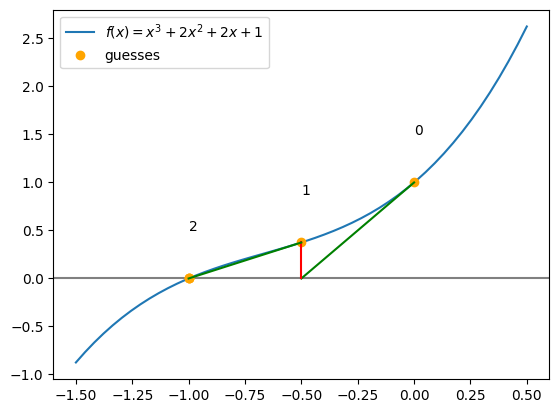

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-1.5, 0.5)

guesses = [0]
while len(guesses) < 5:
    x = guesses[-1]
    guesses.append(x - f(x)/f1(x))

plt.axhline(y=0, color="grey")
plt.plot(xs, [f(x) for x in xs], label="$f(x) = x^3 + 2x^2 + 2x + 1$")
plt.plot(guesses, [f(x) for x in guesses], label="guesses", marker="o", linestyle="", color="orange")
plt.legend()

for i in range(3):
    x_curr = guesses[i]
    x_next = guesses[i+1]

    plt.annotate(f"{i}", xy=(x_curr, f(x_curr) + 0.5))

    plt.plot([x_curr, x_next], [f(x_curr), 0], color="green")
    plt.plot([x_next, x_next], [0, f(x_next)], color="red")

plt.legend()

None

Script:
* And we generalize this by computing the later estimates by subtracting the previous function output divided by the previous slope from the previous estimate.
* This process is shown in this chart.
* But since it gets small, let's look at it in a tabular form too.

## Slides: Estimates from Newton's Method

| $i$ | $x_i$ | $f(x_i)$ |
|---|---:| ---:|
| 0 | 0.0 |&nbsp; 1.000 |
| 1 | -0.5 | 0.375 |
| 2 | -1.0 | 0.000 |
| 3 | -1.0 | 0.000 |

Script:
* See how it gets closer with each iteration?
* That's how Newton's method works.